# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


## Answer:

### Part A

In [1]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

Text(0, 0.5, 'y_train')

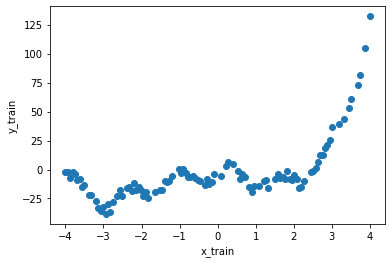

In [2]:
plt.scatter(x_train,y_train)
plt.xlabel("x_train")
plt.ylabel("y_train")

Text(0, 0.5, 'y_test')

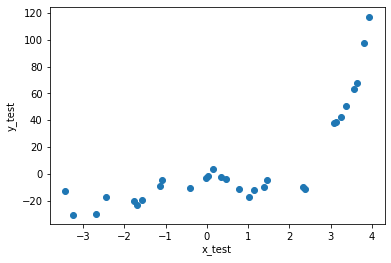

In [3]:
plt.scatter(x_test,y_test)
plt.xlabel("x_test")
plt.ylabel("y_test")

In [4]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 
    degrees = [2, 4, 7]
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    mse_train_array = []
    mse_test_array = []
    for d in degrees:
        lrp.fit(np.vander(np.squeeze(x_train), d+1), y_train)
        y_pred_test = lrp.predict(np.vander(np.squeeze(x_test), d+1))
        y_all = lrp.predict(np.vander(np.squeeze(x_all), d+1))
        ##Test MSE
        mse_test = mean_squared_error(y_test, y_pred_test)
        print('Degree %d test MSE = %.3f' % (d, mse_test))
        ##Train MSE
        y_pred_train = lrp.predict(np.vander(np.squeeze(x_train), d+1))
        mse_train = mean_squared_error(y_train, y_pred_train)
        print('Degree %d train MSE = %.3f' % (d, mse_train))

        mse_train_array.append(mse_train)
        mse_test_array.append(mse_test)
        ##Fit all the models
        ax.plot(x_all, y_all, label='degree %d' % d)
        ax.plot(x_test, y_pred_test, 'o')
        ax.legend(loc=2)
    # YOUR CODE COMES HERE
    #print("IMPLEMENT ME!")
    return mse_train_array, mse_test_array
 

Degree 2 test MSE = 320.064
Degree 2 train MSE = 247.297
Degree 4 test MSE = 31.292
Degree 4 train MSE = 31.720
Degree 7 test MSE = 33.411
Degree 7 train MSE = 30.677


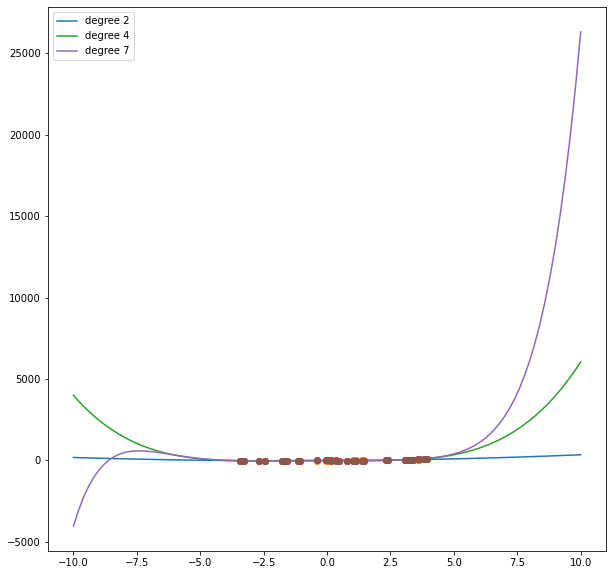

In [5]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

### Part B

b) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

The model with Degree 4 gives the best performance because it minimizes the training and the test error better then the other models. This occurs because of the bias variance trade off. As the models become more more complex with more degrees, the training MSE continues to decrease but the test MSE does not because of the high variance that is being added to the model through the additional complexity. A more complex model may have lower bias because it is overfitting on the training data but this leads the model to have a higher error on the test data because of the higher variance introduced in the more complex model.

### Part C

20% data
Degree 2 test MSE = 402.323
Degree 2 train MSE = 161.171
Degree 4 test MSE = 38.341
Degree 4 train MSE = 35.115
Degree 7 test MSE = 135.208
Degree 7 train MSE = 22.544
40% data
Degree 2 test MSE = 405.805
Degree 2 train MSE = 150.333
Degree 4 test MSE = 33.164
Degree 4 train MSE = 31.625
Degree 7 test MSE = 61.237
Degree 7 train MSE = 25.493
60% data
Degree 2 test MSE = 403.251
Degree 2 train MSE = 150.084
Degree 4 test MSE = 31.781
Degree 4 train MSE = 29.193
Degree 7 test MSE = 60.167
Degree 7 train MSE = 26.099
80% data
Degree 2 test MSE = 407.594
Degree 2 train MSE = 168.119
Degree 4 test MSE = 32.518
Degree 4 train MSE = 29.305
Degree 7 test MSE = 48.077
Degree 7 train MSE = 26.549
100% data
Degree 2 test MSE = 320.064
Degree 2 train MSE = 247.297
Degree 4 test MSE = 31.292
Degree 4 train MSE = 31.720
Degree 7 test MSE = 33.411
Degree 7 train MSE = 30.677


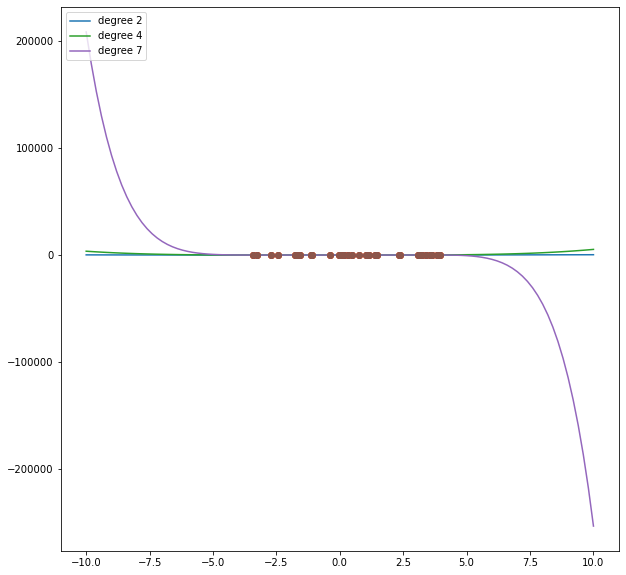

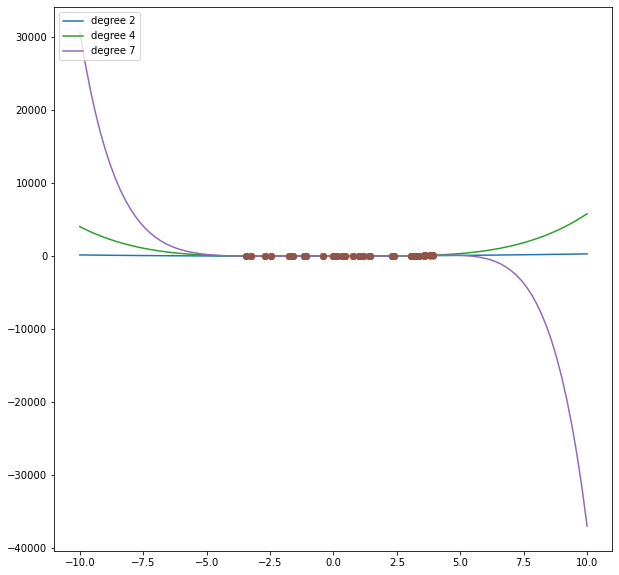

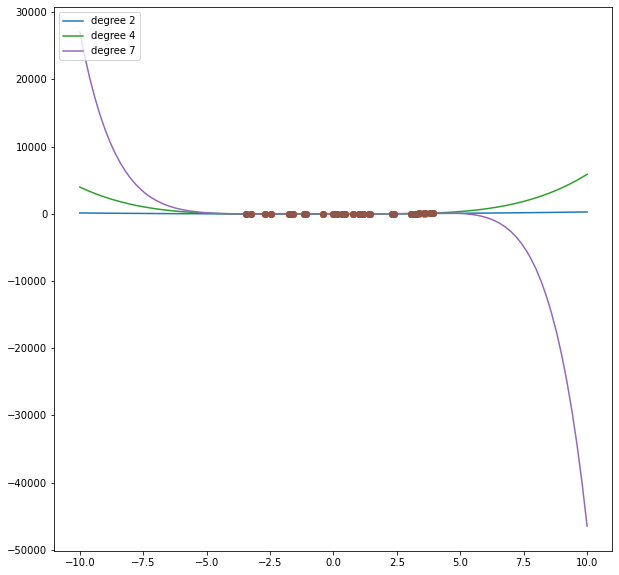

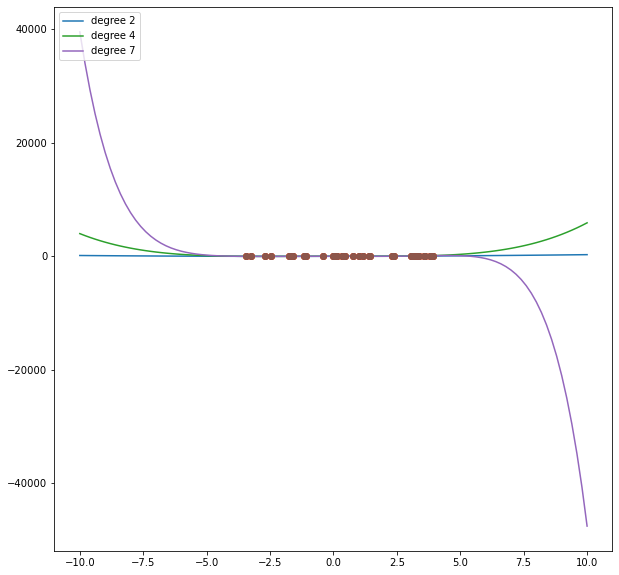

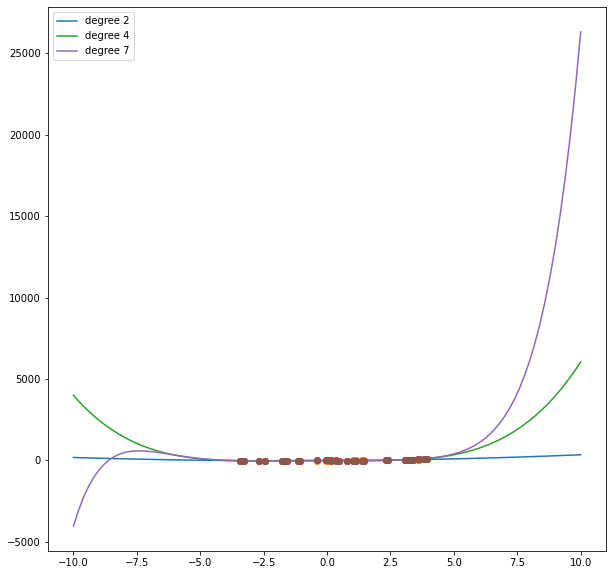

In [6]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

In [7]:
tr_list=[]

tr_list.append(train_rmses_20)
tr_list.append(train_rmses_40)
tr_list.append(train_rmses_60)
tr_list.append(train_rmses_80)
tr_list.append(train_rmses_100)

ts_list=[]

ts_list.append(test_rmses_20)
ts_list.append(test_rmses_40)
ts_list.append(test_rmses_60)
ts_list.append(test_rmses_80)
ts_list.append(test_rmses_100)

In [8]:
from pandas import Series, DataFrame
import pandas as pd

test_df = pd.DataFrame(ts_list,columns=['Degree 2_test','Degree 4_test','Degree 7_test'])
test_df = test_df.apply(lambda x: np.log(x))

In [9]:
train_df = pd.DataFrame(tr_list,columns=['Degree 2_train','Degree 4_train','Degree 7_train'])
train_df = train_df.apply(lambda x: np.log(x))

In [10]:
merged = train_df.merge(test_df,left_index=True, right_index=True)
merged

Degree 2_train  Degree 4_train  Degree 7_train  Degree 2_test  \
0        5.082469        3.558632        3.115467       5.997256   
1        5.012850        3.453933        3.238393       6.005873   
2        5.011194        3.373922        3.261900       5.999560   
3        5.124671        3.377762        3.278997       6.010271   
4        5.510589        3.456948        3.423519       5.768521   

   Degree 4_test  Degree 7_test  
0       3.646513       4.906812  
1       3.501473       4.114758  
2       3.458882       4.097119  
3       3.481797       3.872803  
4       3.443365       3.508876

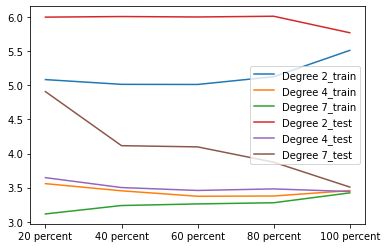

In [11]:
merged['Size']=['20 percent','40 percent','60 percent','80 percent','100 percent']
merged=merged.set_index('Size')

merged.apply(lambda x:plt.plot(x))
plt.legend(merged.columns)
plt.show()

**State the trends you see as you change the size of the training data on each of the models and explain why you see them.**

The RMSE goes up for degree 2 and 7 polynomial degrees as the size of the training set increases. The RMSE for both increase by about 0.5 as the training size goes from 20% to 100%. This is occurring because it is either underfitting or overfitting the data. For the degree 2 polynomial, the model is underfitting and as you add more data, the model is getting worse at predicting. For the degree 7 polynomial, the same issue is occuring but this model is overfitting. The degree 4 polynomial seems to be the optimal model since their is very little fluctuation in RMSE as the training data size increases.

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

a) The advantages of gradient descent include straightforward trajectory towards the minimum that is guaranteed to converge, the learning rate can be fixed to allow updates, gradient descent produces no noise and gives a smaller standard error, and it produces an unbiased estimate of the gradients. The disadvantages include the time and expense it takes to run the model. Stochastic gradient descent seeks to address these disadvantages by increasing the computational speed since it only goes through one example at a time. It also avoids repetition by using randomization. The decreased computation time helps to lower the standard error and the increased noise can help improve the generaliazation error. Stochastic gradient descent does have its disadvantages though. These disadvantages include a potentially longer run time due to the increased noise, and higher variance because the model is using one example at a time. 

b) The Nelder-Mead method dynamically adjusts the step size based on the loss of each new point. If the new point is better than any previous point then it expands the step size to speed it towards the bottom. If the new point is worse then any previous point then it shortens the step size to converge near the minima. The method is simple and works well on low-dimensional functions. The method does not work well on problems with more than a dozen parameters. One of the main problems for this method in complex models is figuring out the direction to go into. 

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

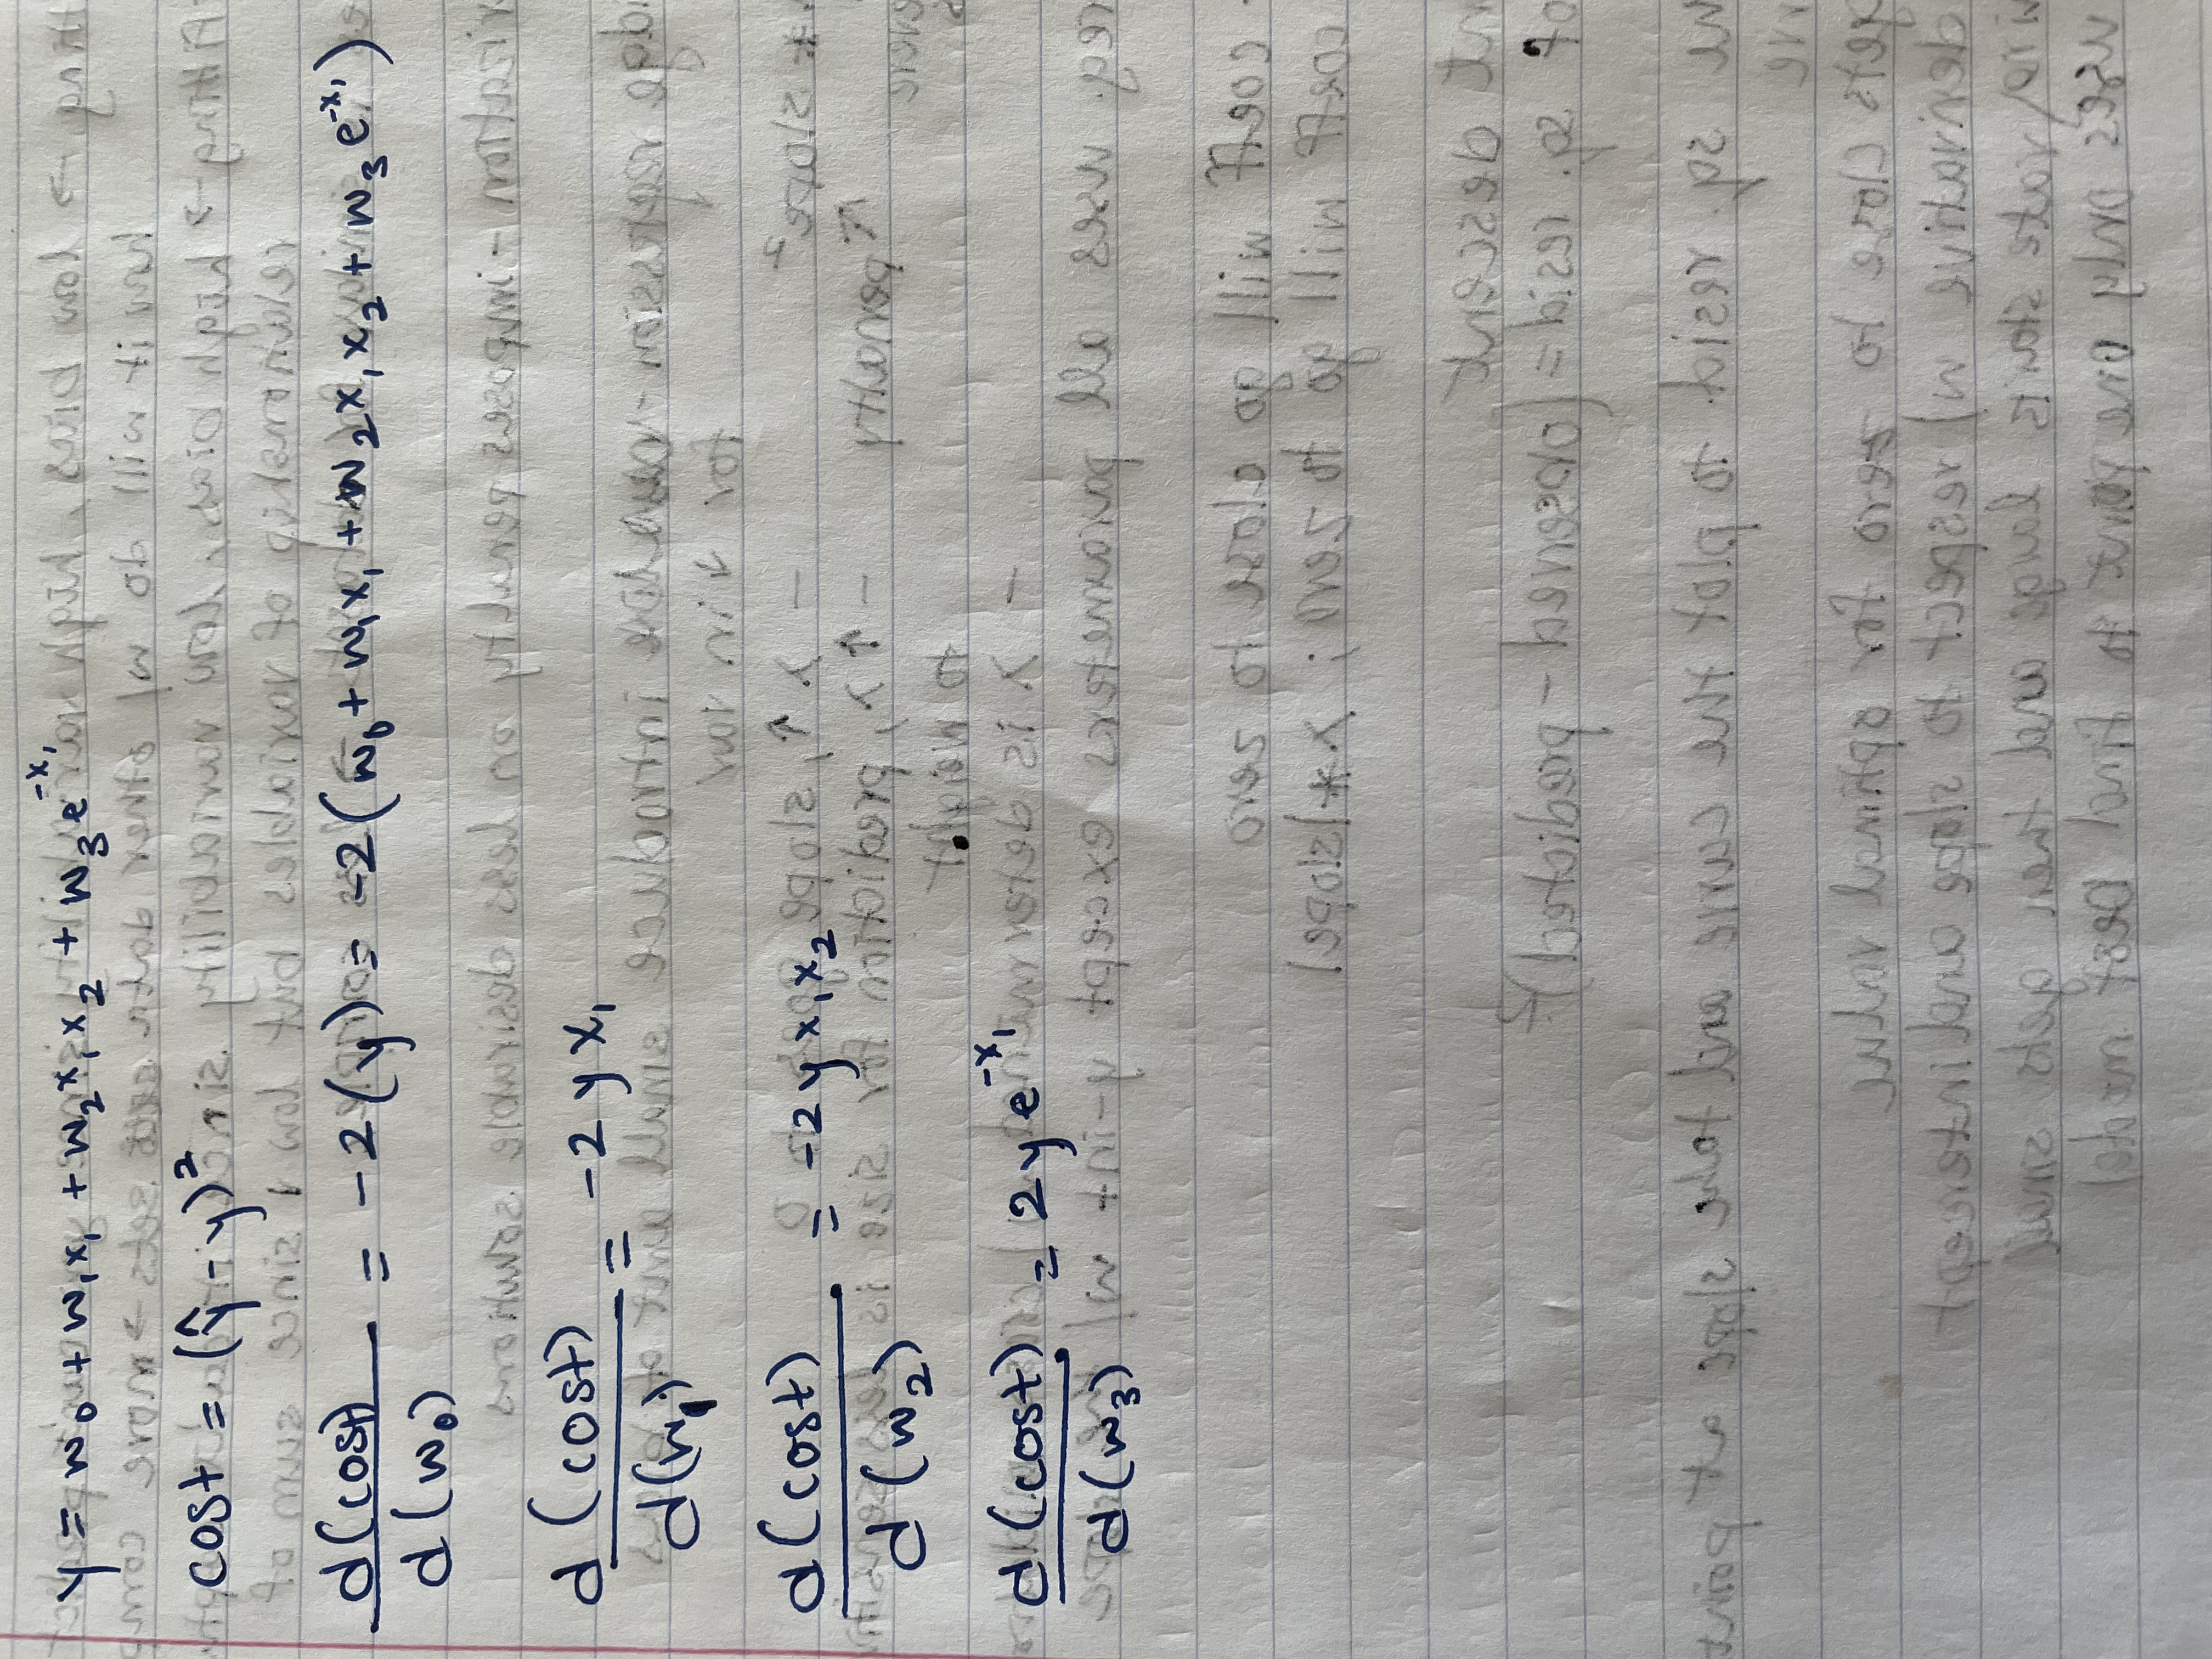

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [12]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [13]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
         # = please put your codes here to update the self.coef using SGD
        self.coef = self.coef - (self.learning_rate*gradient)
        return self.coef

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                Xi = X[i,:]   
                error = self.linearPredict(Xi) - y[i]
                
              # Compute gradients
                gradient = np.array([2*error, 
                                  2*error*Xi[0], 
                                  2*error*Xi[1],
                                  2*error*math.exp(Xi[0]) 
                ])
               
              # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
      return X.dot(self.coef) 

In [14]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer:

a) For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the  𝑤  parameters as a function of epoch (for 15 epochs).

<ipython-input-13-3a0bdc6795d9>:35: RuntimeWarning: overflow encountered in double_scalars
  2*error*math.exp(Xi[0])
<ipython-input-13-3a0bdc6795d9>:18: RuntimeWarning: invalid value encountered in subtract
  self.coef = self.coef - (self.learning_rate*gradient)
<ipython-input-13-3a0bdc6795d9>:18: RuntimeWarning: overflow encountered in multiply
  self.coef = self.coef - (self.learning_rate*gradient)


(0.0001, 0)
(0.0001, 10)
MSE scores [0.03546496565997439, 0.03546496565997439]


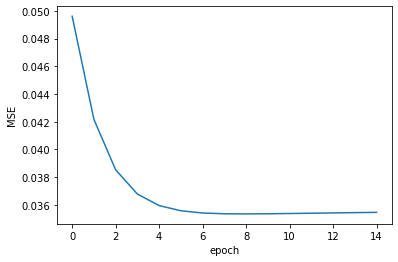

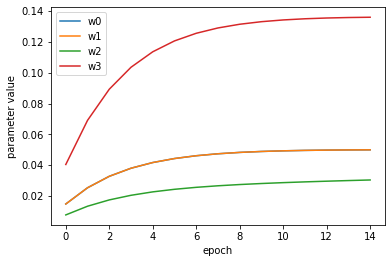

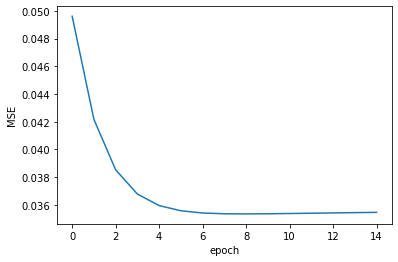

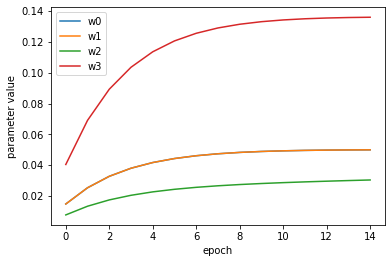

In [15]:
import math

ls = []
for l in range(0, len(learning_rate)):
    for r in range(0, len(regularization)):
        ls.append((learning_rate[l], regularization[r]))

mse_list = []

for i in range(0, len(ls)):
    sgd = Regression(ls[i][0], ls[i][1], n_epochs)
    sgd.fit(X,y,plot=False)
    mse_list.append(sgd.lowest_mse)

top2 = np.argsort(mse_list)[:2]

print(ls[top2[0]])
print(ls[top2[1]])

for i in top2:
    sgd = Regression(ls[i][0], ls[i][1], n_epochs)
    sgd.fit(X,y,plot=True)

print('MSE scores', mse_list[:2])

b) Report the MSE of the two best combinations of learning rate and regularization constant.

The 2 best learning rate and regularization combinations are (0.0001, 0) and (0.0001, 10) and the MSE for both is 0.035.